In [1]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import dateutil
import datetime

In [2]:
data = pd.read_csv("Food_Inspections.csv")

In [3]:
#Select records with Pass or Fail results
df4 = data.loc[data['Results'].isin(['Fail', 'Pass','Pass w/ Conditions'])]
df4 = df4.iloc[:, [11,12]]

In [4]:
#Tidy up Inspection Type entries and groupby Inspection Type and Results
df4['Inspection Type'].str.lower()
df4 = df4.groupby(['Inspection Type', 'Results']).size().reset_index(name = 'Counts')
df4

,Inspection Type,Results,Counts
0,1315 license reinspection,Fail,1
1,ADDENDUM,Pass,1
2,Business Not Located,Fail,1
3,CANVAS,Pass,1
4,CANVASS FOR RIB FEST,Pass,1
5,CANVASS RE INSPECTION OF CLOSE UP,Pass,1
6,CANVASS SCHOOL/SPECIAL EVENT,Pass,1
7,CANVASS SPECIAL EVENTS,Pass,1
8,CANVASS/SPECIAL EVENT,Pass,1
9,CHANGED COURT DATE,Pass,1


In [5]:
#Eliminate Inspectioan Type with less than 5 entries, Calculate inspection passing rate for each type
df4 = df4.loc[df4['Counts'] >5]
df4['ratio'] = df4['Counts']/ df4.groupby('Inspection Type')['Counts'].transform('sum')
df4 = df4.loc[df4['Results'].isin(['Pass','Pass w/ Conditions'])]
df4 = df4.groupby(['Inspection Type'])['ratio'].sum().reset_index()
df4 = df4.sort_values(by =['Inspection Type'])
df4

C:\Users\Uriel\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Inspection Type,ratio
0,Canvass,0.785203
1,Canvass Re-Inspection,0.932058
2,Complaint,0.659522
3,Complaint Re-Inspection,0.903740
4,Complaint-Fire,0.616883
5,Complaint-Fire Re-inspection,0.853659
6,Consultation,0.827744
7,License,0.617571
8,License Re-Inspection,0.881001
9,License-Task Force,0.391376


Text(0.5, 0, '')

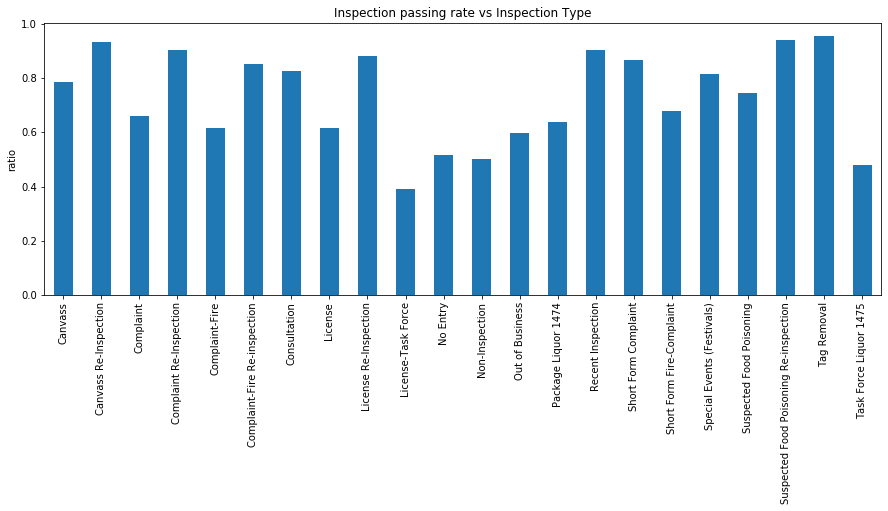

In [6]:
#plot bar graph for Inspection passing rate vs Inspection Type
df4.plot.bar(x='Inspection Type', y='ratio', legend=False, figsize =(15,5))
plt.title('Inspection passing rate vs Inspection Type')
plt.ylabel('ratio')
plt.xlabel('')